# DonorsChoose

DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.

Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:

How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible
How to increase the consistency of project vetting across different volunteers to improve the experience for teachers
How to focus volunteer time on the applications that need the most assistance

The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


## Importing all the needed Modules 

In [10]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading data

In [11]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

## 1.2 Data Analysis

#### 1.2.1 Finding the shape of the data(data points).

In [4]:
print("Number of data points in train data {}".format(project_data.shape))
print('-'*50)
print("The attributes of data :{}" .format(project_data.columns.values))


Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data :['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [12]:
print("Number of data points in resource summary{}".format(resource_data.shape))
print("-"*50)
print("The attributes of data:{}".format(resource_data.columns.values))
resource_data.head(5)

Number of data points in resource summary(1541272, 4)
--------------------------------------------------
The attributes of data:['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

#### 1.2.2 Finding the Percentage of data thet was approved or rejected .

In [13]:
y_value_counts = project_data["project_is_approved"].value_counts()
print("The Number of projects approved are :" ,y_value_counts[1] ," percentage of Projects approved are: ",\
      (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%")
print("The Number of projects not approved are :" ,y_value_counts[0] ," percentage of Projects approved are: ",\
      (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%")


The Number of projects approved are : 92706  percentage of Projects approved are:  84.85830404217927 %
The Number of projects not approved are : 16542  percentage of Projects approved are:  15.141695957820739 %


#### 1.2.3 Visual Representaion  Approved and not approved data.

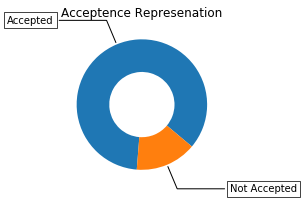

In [15]:
#the code reffred form the above site 
## https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and \
# polar-charts-pie-and-donut-labels-py
## This code below help us to visualize the above attained piece of information about the percentage of projects approved
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Acceptence Represenation")

plt.show()

### Summary of observations:
1. The data represents, about 85 percantage of the projects were approved . 
2. 15 percantage of the data was not approved .
3. The Donut Plot shows a clear picture of the analysis done.

## 1.2.1 Univariate Analysis of school state and Project approved in ecah state 

In [18]:
temp = pd.DataFrame(project_data.groupby('school_state')['project_is_approved'].apply(np.mean)).reset_index()
temp.columns = ['state_code', 'num_proposals']
temp.head(10)

state_code  num_proposals
0         AK       0.840580
1         AL       0.854711
2         AR       0.831268
3         AZ       0.838379
4         CA       0.858136
5         CO       0.841584
6         CT       0.868912
7         DC       0.802326
8         DE       0.897959
9         FL       0.831690

In [19]:
# Please find the list of the sates https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by='num_proposals',inplace =True )
print("The Stated with the low Approval rate of projects ",temp.head(5))
print("The Stated with the High Approval rate of projects ",temp.tail(5))

The Stated with the low Approval rate of projects     state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
The Stated with the High Approval rate of projects     state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


### Summary of observations:
1. Form the above analysis, it is summarize Delaware(DE) is the state with highest number number of projects approved .
2. Vermount(VT) has recoreded the least number of projects beeing approved . 

#### Code for Univariate analysis using stacked bar plots , (for reuseablility of code)

In [51]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [84]:
# Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

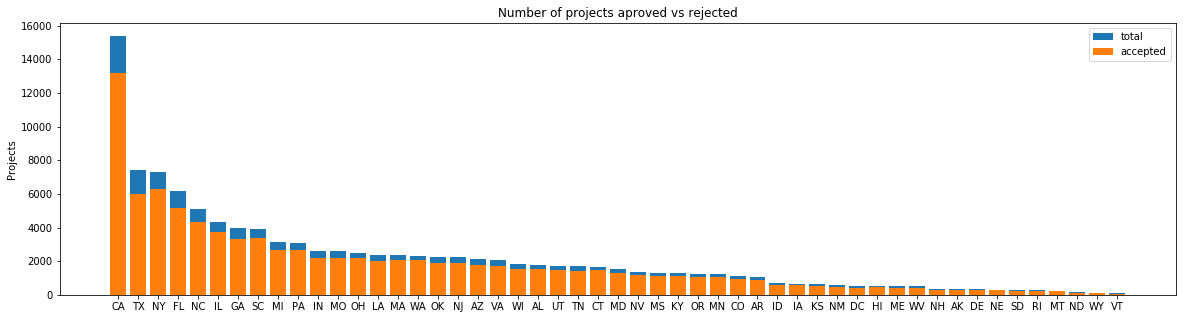

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [85]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

### Summary of observations:
1. All the listed states have the project approval rate above 80 %.
2. California(CA) has the highest number of project approval rate at 85 % and the hihest number of project submission.
3. Vermount(VT) had the lowest rate of project approval at 80 and has the lowest number of project submission.

## 1.2.2 Univariate Analysis of  "teacher_prefix "  and "project_is_approved"

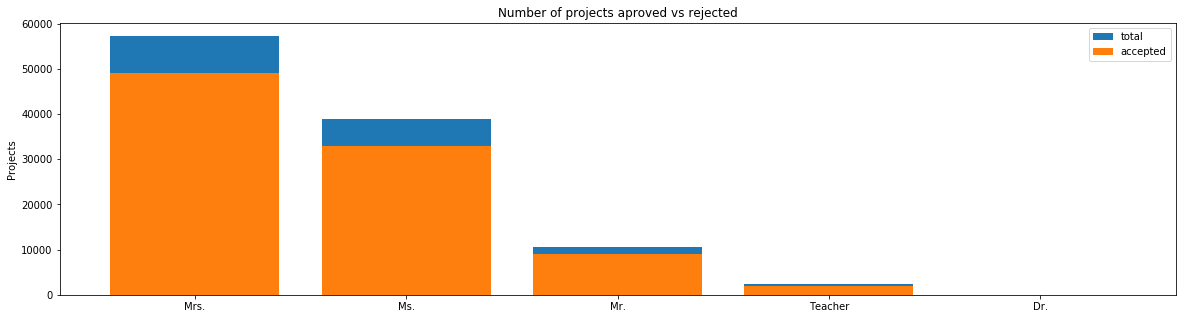

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [12]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### Summary of observations:
1. The number of projects submitted by Female tecahers are higher tha male teachers 
2. The approval rate is higher with tceahers having prefix "Mrs.,Ms" , seems tecahers having hiher experince have a good chance of acceptance . 
3. Tecahers with prefix Dr. have a very low submission and the approval rate is around 70 percantage.


## 1.2.3 Univariate Analysis of  project_grade_category

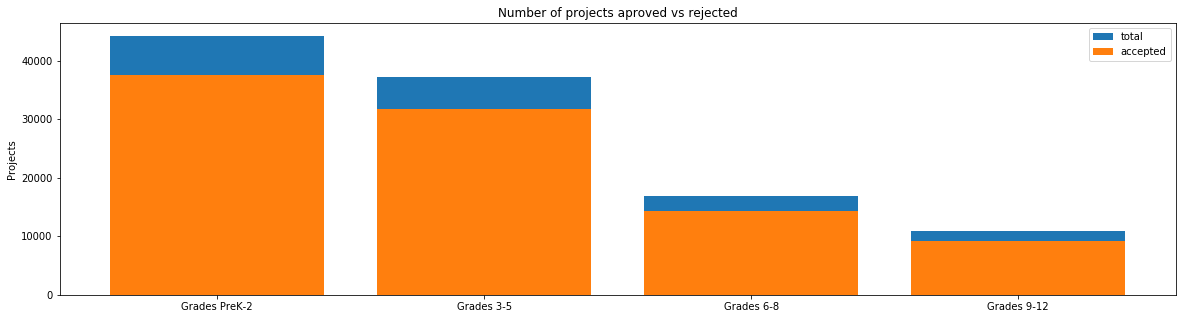

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [13]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### Summary of observations:
1. From the observation we basically cannot classify between the Grades as the varience around all the grades are similar.
2. Grade 2 has the highest number of Submissions as comapred to other Grades.
3. Grades 9-12  has the lowest submission rate.

## 1.2.4 Univariate Analysis project_subject_categories and Text preprocessing

In [92]:
'''The text preprocessing is done before we go into analysing the data , the preprocessing innvolves diffrent steps of removing\
unwanted prefix and specail characters like " & " in the data , so as because it increases the dimension of the data when we \
convert the catogorial data into numerical form i.e by one hot encoding '''
'''Below are the references for the oprations performed '''
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

catogories = list(project_data['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','')
        j = j.replace(' ','') 
        temp+=j.strip()+" " 
        temp = temp.replace('&','_')
    cat_list.append(temp.strip())

In [93]:
#Replace the Data coloum in the corpus by the processed data coloumn and drop the old coloum 
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

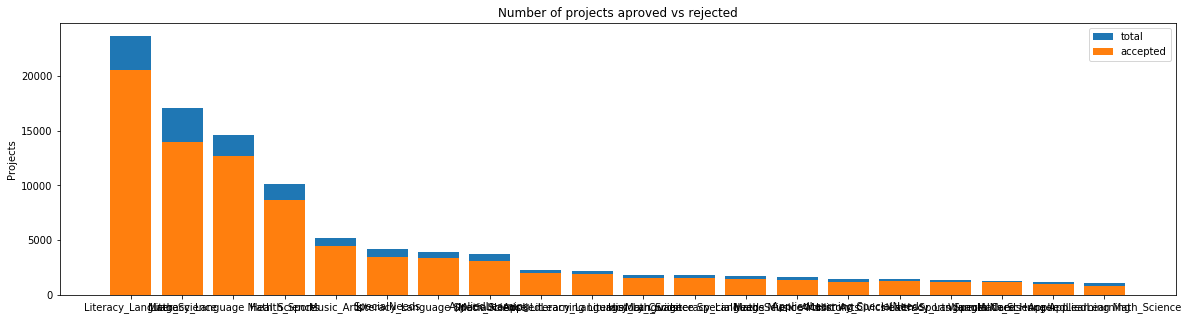

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [94]:
# After cleaning the data we can do the univarient analysis
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

### Summary of observations:
1. As the data representaion shows there can me multiple categories of data as "Literacy_Language Math_Science" and "History_Civics Literacy_Language", so when we do the one hot encoding , it be bascially a matrix of more than 1 values . 
2. Literacy_Language categorie has the highest number of submissions and approval rate which is 86 percantage, which is followed by Math_Science . 
3. The highest number of approval is for "Warmth Care_Hunger" wherein the tottal submission was 1309 and 1212 were approved resulting in 92 percantage approval rate . 
4. AppliedLearning Math_Science has the lowest submmison rate by teachers and the approval rate stands around 81 percentage . 
5. The varience between all the categories is not very large . 
6. The Multi-categorie of the subjects have a higher acceptance level as compared to others.

###  1.2.4.1 Counting all the words and converting it into Dictonary 

In [95]:
# we count all the words the data column so as it can be used in plotting or can be used in the one-hotencoding processed \
# as this is a catogorail value  
# for counting  of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


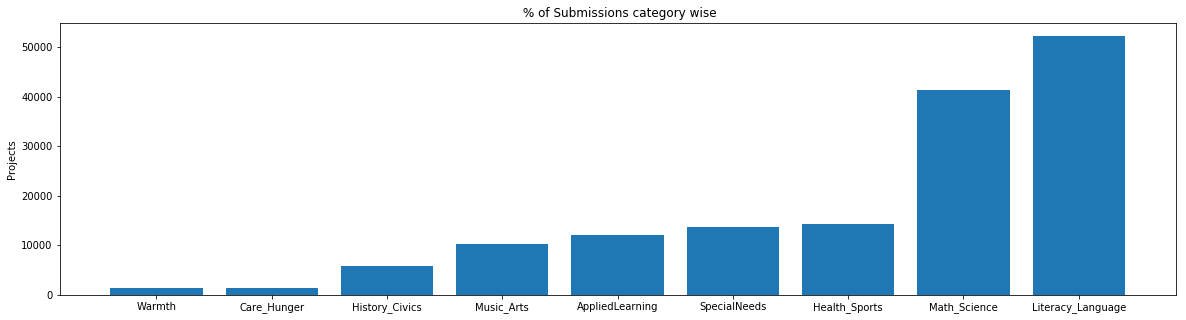

In [96]:
#then we convert the words into dictonary
#then we sort the values in the dictonary by values refrence  \
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict =dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))
#plotting the graph
ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))


plt.ylabel('Projects')
plt.title(' % of Submissions category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()


### Summary of observations: Considering only one category Words in the Corpus 
1. The data represntaion shows , the heighest submissions are for Literacy_Language and the lowest number of submission is for warmth and Care_Hunger,and History_Civics follows


## 1.2.5  Univariate Analysis project_subject_subcategories and Text preprocessing

In [97]:
'''The text preprocessing is done before we go into analysing the data , the preprocessing innvolves diffrent steps of removing\
unwanted prefix and specail characters like " & " in the data , so as because it increases the dimension of the data when we \
convert the catogorial data into numerical form i.e by one hot encoding '''
'''Below are the references for the oprations performed '''
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_catogories = list(project_data['project_subject_subcategories'].values)

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [101]:
# #now we replace the column project_subject_subcategories and drop it 
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

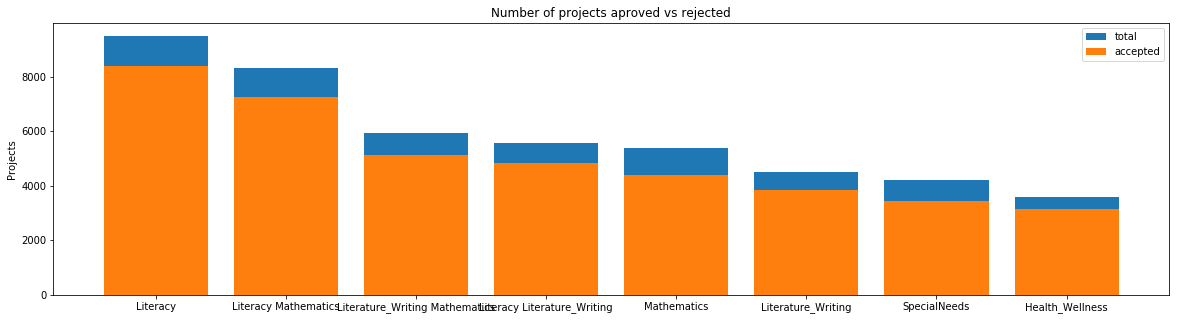

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
             clean_subcategories  project_is_approved  total       Avg
318  Literacy Literature_Writing                 4823   5571  0.865733
342                  Mathematics                 4385   5379  0.815207
330           Literature_Writing                 3846   4501  0.854477
392                 SpecialNeeds                 3431   4226  0.811879
289              Health_Wellness                 3131   3583  0.873849


In [102]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=8)

### Summary of observations:
1. The above represents that clean_subcategories have a verince of 10 percentage through out .
2. The highest approved is Literacy at 88 percentage followed with Literacy Mathematics ,EnvironmentalScience Literacy.
3. The lower table also shows similar varience , and the submission rate is lower on the bottom side . 

###  1.2.5.1 Counting all the words and converting it into Dictonary ( this step is common for the Categorical values) 

In [103]:
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

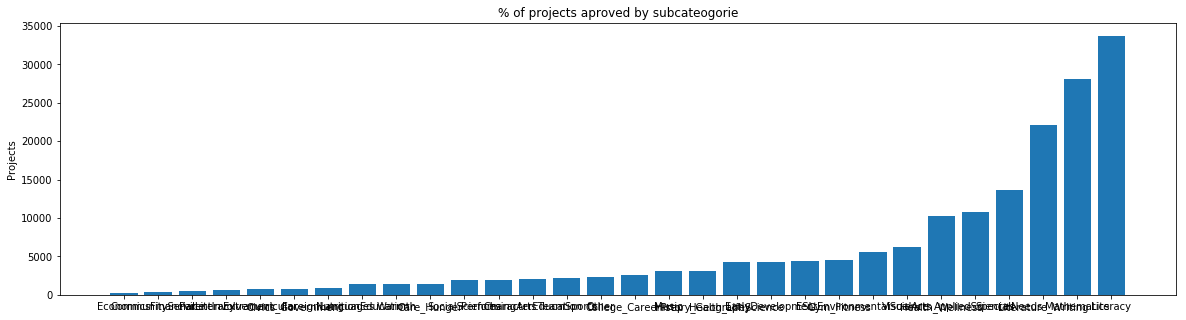

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


In [104]:
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved by subcateogorie')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

## 1.2.6 Univariate Analysis: Project_title 

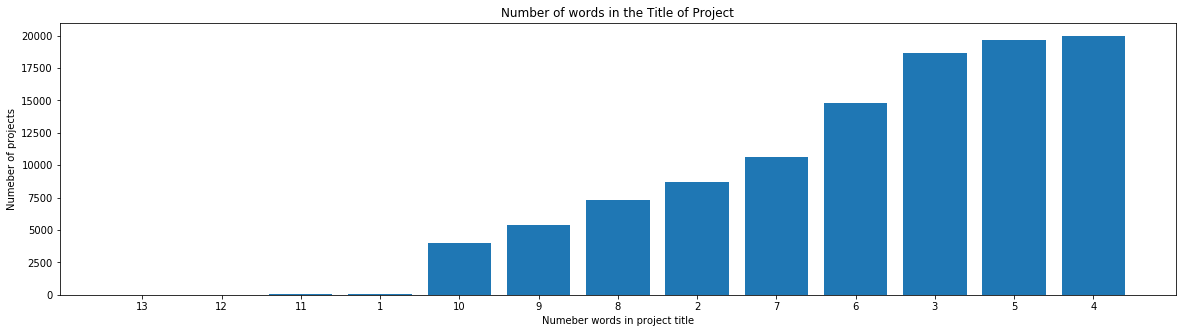

In [105]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


# ploting it 
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Number of words in the Title of Project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()


### Summary of observations:
1. Most of the project title have 4 words,which is followed by 5 
2. Most of the projects have 3, 4 or 5 words in the title.
3. There is only one project with a title length of 13

In [108]:
# here we count the number of words in the approved and the rejected Project Ttiles
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values
rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values



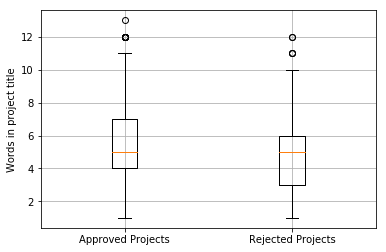

In [26]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

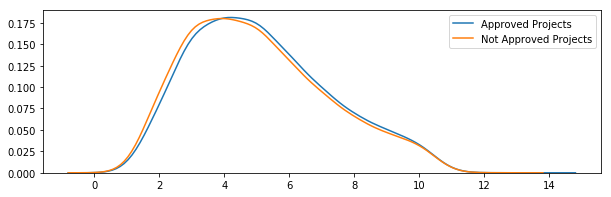

In [27]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

### Summary of observations:
1. The mark of the approved projects are more as compared.
2. There is no specific difference that can be seen or observed as per Project Titles,so we will not comsider this as a feature

## 1.2.7 Univariate Analysis:  Project Essay's and Text Processing 

In [28]:
# In this step we create a new coloum "essay" and put all the "project_essay_" into it by concardination 
project_data["essay"] = project_data["project_essay_1"].map(str)+\
               project_data["project_essay_2"].map(str)+\
               project_data["project_essay_3"].map(str)+\
               project_data["project_essay_4"].map(str)

In [29]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values
rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

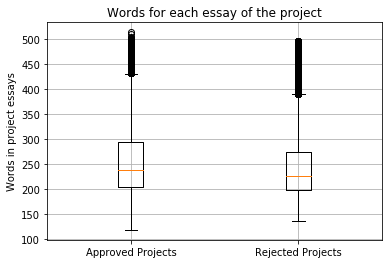

In [30]:
#box plot , here it is basically plotted by the percentile values 
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

###  Summary of observations:
1. The 50th percentile values of both the Approved and not Approved differentiated words lie very close.
2. The approved projects have a higher numbers of words as compared to the not approved projects.

### 1.2.8 Univariate Analysis: Cost per project

#### The Cost and the Quantity for the resources needed are given in the resource.csv file 

In [31]:
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [32]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [9]:
# now we merge the two data frames on id's of the projects as said in the descripiton the resource_data match with the id's \
# of the project data
project_data = pd.merge(project_data,price_data,on="id",how = "left")

In [34]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

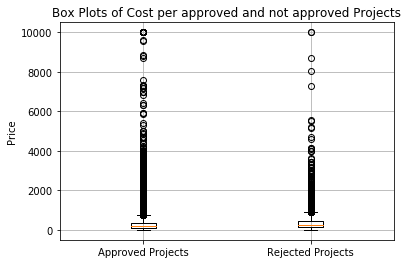

In [35]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

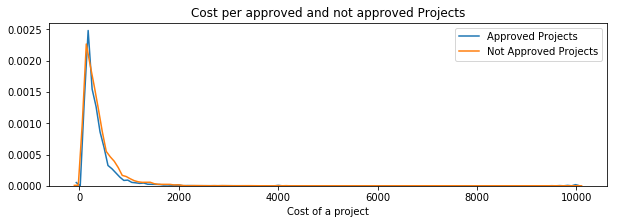

In [36]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

###  Summary of observations:
1. The distribution is right Skewed.
2. The Approved project seems have less prise than the not approved projects,but nothing is clearly understood form both the plots.

In [37]:
from prettytable import PrettyTable
# http://zetcode.com/python/prettytable/ here you can reffer how to make PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

###  Summary of observations:
1. Form the PrettyTable , we can conclude that the projects having relatively low cost were approved.
2. The highest project which was approved was having 9999 dollar as price.
3. The projects which were approved were below 10 dollar . 

### 1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects

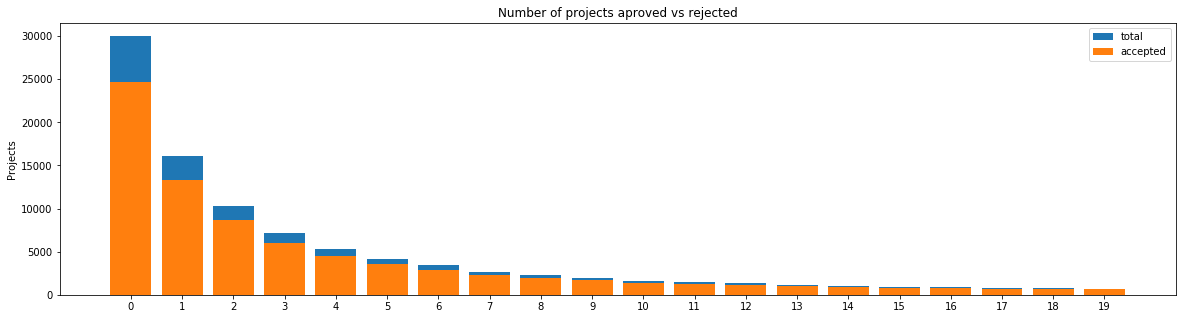

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
15                                            15                  818    942   
16                                            16                  769    894   
17                                            17                  712    803   
18                                            18                  666    772   
19                                       

In [38]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=20)

###  Summary of observations:
1. The Avrage Approval percentage lies between 80 to 90 % for all the previously posted projects
2. The data represents that it's not a mandatory that if a teacher had posted a project previously would get approved.
3. so it's linear , and equally distributed as the teachers who had posted previously also have a desent chance of getting approved as the teacher who posted 710 times before have a approval rate of 89 %

### 1.2.10 Univariate Analysis:" project_resource_summary " and Text preprocessing

In [39]:
# here we are considering the stop words and you can also do it with outwith considering it 
# https://gist.github.com/sebleier/554280
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [40]:
# here we are considering a sipmle function to remove all the stop words, html tags and special characters  
#please find the link for the code # https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [41]:
# from tqdm import tqdm
project_resource_summary_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_resource_summary'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    project_resource_summary_essays.append(sent.lower().strip())
print(len(project_resource_summary_essays))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 17616.49it/s]


109248


In [10]:
project_data['project_resource_summary_essays'] = project_resource_summary_essays
project_data.drop(['project_resource_summary'], axis=1, inplace=True)

In [43]:
approved_project_resource_summary = project_data[project_data['project_is_approved']==1]['project_resource_summary_essays']\
.str.split().apply(len)
approved_project_resource_summary = approved_project_resource_summary.values

rejected_project_resource_summary = project_data[project_data['project_is_approved']==0]['project_resource_summary_essays']\
.str.split().apply(len)
rejected_project_resource_summary = rejected_project_resource_summary.values


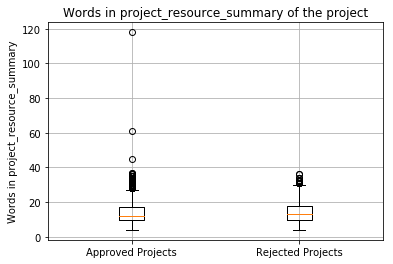

In [44]:
plt.boxplot([approved_project_resource_summary, rejected_project_resource_summary])
plt.title('Words in project_resource_summary of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project_resource_summary')
plt.grid()
plt.show()

###  Summary of observations:
1. No proper conclusion can be drawn from the above plot 

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [45]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)
'''As in here we can see there are many specail characters , HTML tags and other characters like \\n,\\r so we should remove \
them before we proceed to the text processing below are some codes and references for the processes involved  '''

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

'As in here we can see there are many specail characters , HTML tags and other characters like \\n,\\r so we should remove them before we proceed to the text processing below are some codes and references for the processes involved  '

In [46]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [47]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [48]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [49]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [50]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [51]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:10<00:00, 1541.48it/s]


In [52]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

### 1.3.2 Project title Text

In [53]:
# printing some random essays.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[120])
print("="*50)
print(project_data['project_title'].values[1060])
print("="*50)
print(project_data['project_title'].values[20100])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
Flexible Seating!
From Metal Chairs to Flexible Seating
Building a Bridge from Struggling to Being Successful
Inspiring Minds by Enhancing the Educational Experience


In [54]:
preprocessed_titles = []

for titles in tqdm(project_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles.append(title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 28779.47it/s]


In [55]:
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[110])
print("="*50)
print(project_data['project_title'].values[1060])
print("="*50)
print(project_data['project_title'].values[20100])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
Super Supplies
From Metal Chairs to Flexible Seating
Building a Bridge from Struggling to Being Successful
Inspiring Minds by Enhancing the Educational Experience


## 1. 4 Preparing data for models

In [56]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay', 'price', 'quantity', 'project_resource_summary_essays'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

### One Hot Encode - Clean Categories of Projects
1. In this code we generatre the one-hot encoding of the data , this is done becasue we have the Categorial features and we have to convert it into numerical values. 
2. The Categorial data's is mentioned above 

In [57]:
from sklearn.feature_extraction.text import tCountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


## One Hot Encode - School States 

In [58]:
#as we did not sount thwwords in the corpus for the School_state we will do it now 
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

In [59]:
#creating the dictonary and sorting it with the values 
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [60]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_categories_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encoding ",school_state_categories_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encoding  (109248, 51)


### One Hot Encode - Clean Sub Categories of Projects

In [61]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encoding ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encoding  (109248, 30)


### One Hot Encode - Project Grade Category 


In [109]:
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())
del my_counter["Grades"]

In [110]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [111]:
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())

project_grade_categories_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encoding ",project_grade_categories_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2']
Shape of matrix after one hot encoding  (109248, 4)


### One Hot Encode - Teacher Prefix

In [65]:
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [66]:
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [67]:
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype("U"))
print(vectorizer.get_feature_names())

teacher_prefix_categories_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype("U"))
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot.shape)

['nan', 'Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encoding  (109248, 6)


## 1.4.2 Vectorizing Text data

### 1.4.2.2 Bag of words preprocessed_essays

In [68]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after BAG",text_bow.shape)

Shape of matrix after BAG (109248, 16623)


### 1.4.2.3 Bag of words Project Title

In [69]:
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after BAG ",title_bow.shape)

Shape of matrix after BAG  (109248, 3329)


### 1.4.2.4 Bag of words Project_resource_summary Title

In [70]:
project_resource_summary_essays
vectorizer = CountVectorizer(min_df=10)
text_bow3 = vectorizer.fit_transform(project_resource_summary_essays)
print("Shape of matrix after BAG ",text_bow3.shape)

Shape of matrix after BAG  (109248, 5797)


### 1.4.2.5 TFIDF of preprocessed_titles

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after TFIDF ",text_tfidf.shape)

Shape of matrix after TFIDF  (109248, 16623)


In [72]:
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after TFIDF ",title_tfidf.shape)

Shape of matrix after TFIDF  (109248, 3329)


### 1.4.2.6 Using Pretrained Models: Avg W2V of preprocessed_essays

In [73]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables/
# -in-python/
# make sure you have the glove_vectors file
with open('glove_vectors.txt', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

### 1.4.2.7 Avg W2V of preprocessed_essays

In [74]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:51<00:00, 2116.05it/s]


109248
300


### 1.4.2.8 AVG W2V of project_title

In [75]:
avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles.append(vector)

print(len(avg_w2v_vectors_titles))
print(len(avg_w2v_vectors_titles[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 54330.68it/s]


109248
300


### 1.4.2.9 TFIDF weighted W2V of preprocessed_essays using Pretrained Models

In [76]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [77]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [06:16<00:00, 371.93it/s]


109248
300


### 1.4.2.10 TFIDF weighted W2V on project_title

In [78]:

tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [79]:
tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title.append(vector)

print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 16916.52it/s]


109248
300


###  Summary of observations:
1. We converted the categorial features into numerical form by one hot encdoing 
2. We converted all the text features into numerical or matrix form by using diffrent menthods like "Bag of words","Avg . word"
3. If we look at the shape of rows of all the matrix it must be same.

## 1.4.3 Vectorizing Numerical features

###  1.4.3.1 Vectorizing - Price - Numerical Data

In [80]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [81]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

###  Summary of observations:
1. The mean of the data represents , on an average each project cost's 299 dollars.
2. As concluded before the highest cost was 10k dollars.
3. The standard deviation is 367 dollars so , if we apply the 65-98-99 rule , then it implies that 65 % of the cost lies in the range of 1 standard deviation (i.e (299+367) and (376-299)
4. so the we can conclude that 65 % of the projects cost lie between the range of 69 dollars to 666 dollars

### 1.4.3.2 Vectorizing - Quantity - Numerical Data

In [82]:
import warnings
warnings.filterwarnings("ignore")

quantity_scalar = StandardScaler()

## Finding the mean and standard deviation of this data
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) 
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

Mean : 16.965610354422964, Standard deviation : 26.182821919093175


###  Summary of observations:
1. The mean represnts the average number is resource quantity is needed for the project.

### Vectorizing - Number of Projects Proposed Previously by the Teacher - Numerical Data

In [83]:
prev_projects_scalar = StandardScaler()

## Finding the mean and standard deviation of this data
prev_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
print(f"Mean : {prev_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(prev_projects_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
prev_projects_standardized = prev_projects_scalar.transform/
(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard deviation : 27.77702641477403


In [84]:
prev_projects_standardized

array([[-0.40152481],
       [-0.14951799],
       [-0.36552384],
       ...,
       [-0.29352189],
       [-0.40152481],
       [-0.40152481]])

### Summary :
1. The data represents Teacher's generally on an average post 11 projects.

### 1.4.4 Merging all the above features
- Now we merge all the numerical vectors that is  catogorical, text, numerical vectors

In [85]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [86]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

### 2.   Ploting FOUR t-SNE plots with each of these feature sets.
1. categorical, numerical features + project_title(BOW)
2. categorical, numerical features + project_title(TFIDF)
3. categorical, numerical features + project_title(AVG W2V)
4. categorical, numerical features + project_title(TFIDF W2V)

### 2.1 TSNE with BOW encoding of project_title feature with 5000 Data points

In [87]:
X = hstack((categories_one_hot, sub_categories_one_hot, \
            school_state_categories_one_hot, project_grade_categories_one_hot, teacher_prefix_categories_one_hot,\
            price_standardized, quantity_standardized, prev_projects_standardized, title_bow))
X.shape

(109248, 3433)

In [99]:
from sklearn.manifold import TSNE
# https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.sparse.coo_matrix.tocsr.html
X = X.tocsr() 
X_new = X[0:5000]
X_new

<5000x3433 sparse matrix of type '<class 'numpy.float64'>'
	with 59580 stored elements in Compressed Sparse Row format>

In [100]:
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) ,\
# .toarray() will convert the sparse matrix into dense matrix

X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity = 30, random_state = 0,learning_rate=200)
tsne_data_b = model.fit_transform(X_new)

In [102]:
# here we are using labels as target features . 
labels = project_data["project_is_approved"]
labels_new = labels[0: 5000]
len(labels_new)

5000

In [104]:
tsne_data_b = np.vstack((tsne_data_b.T, labels_new)).T
# Create a new DataFrame
tsne_df_b = pd.DataFrame(tsne_data_b, columns = ("1st_Dim","2nd_Dim","Labels"))
tsne_df_b.shape

(5000, 3)

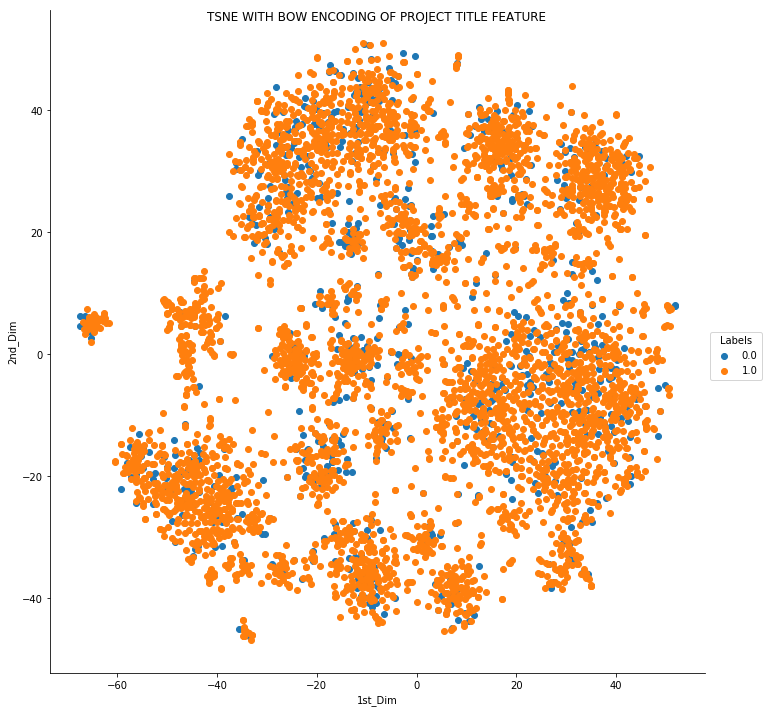

In [105]:
sns.FacetGrid(tsne_df_b, hue = "Labels", size = 10).map(plt.scatter, "1st_Dim", "2nd_Dim")\
.add_legend().fig.suptitle("TSNE WITH BOW ENCODING OF PROJECT TITLE FEATURE ")
plt.show()

### Summary of Observation
1. The points are overlapping a lot.
2. No proper concluion can be drawn.

## 2.2 TSNE with TFIDF encoding of project_title with 5000 Data points

In [107]:
X = hstack((categories_one_hot, sub_categories_one_hot, school_state_categories_one_hot,\
            project_grade_categories_one_hot, teacher_prefix_categories_one_hot, price_standardized,\
            quantity_standardized, prev_projects_standardized, title_tfidf))
X.shape

(109248, 3433)

In [110]:
X = X.tocsr()
X_new = X[0:5000,:]

In [111]:
X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity = 30, random_state = 0,learning_rate=200)
tsne_data_tfidf = model.fit_transform(X_new)

In [112]:
tsne_data_tfidf = np.vstack((tsne_data_tfidf.T, labels_new)).T
tsne_df_tfidf = pd.DataFrame(tsne_data_tfidf, columns = ("1st_Dim","2nd_Dim","Labels"))
tsne_df_tfidf.shape

(5000, 3)

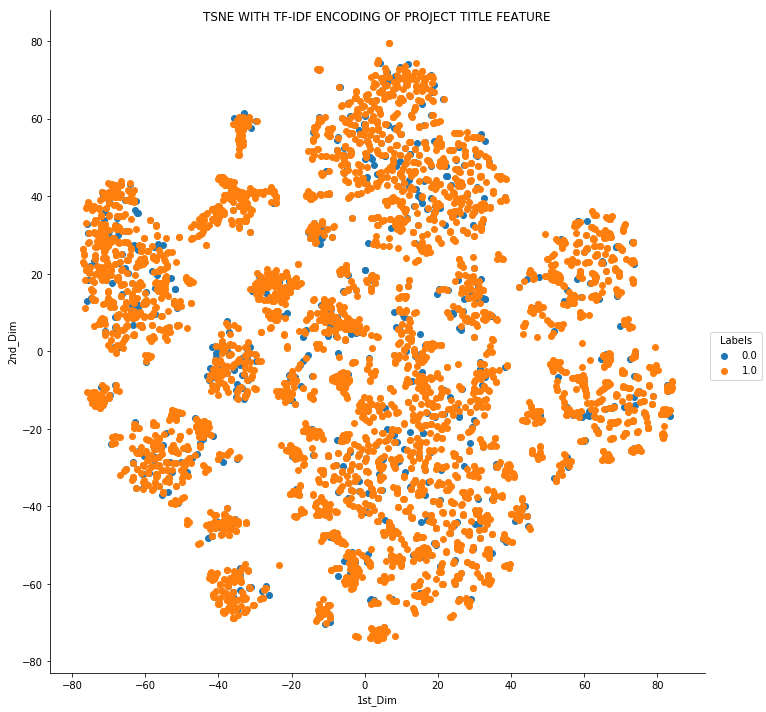

In [114]:
sns.FacetGrid(tsne_df_tfidf, hue = "Labels", size = 10).map(plt.scatter, "1st_Dim", "2nd_Dim")\
.add_legend().fig.suptitle("TSNE WITH TF-IDF ENCODING OF PROJECT TITLE FEATURE ")
plt.show()

### 2.3 TSNE with AVG W2V encoding of project_title 5000 Data points 

In [115]:
X = hstack((categories_one_hot, sub_categories_one_hot, school_state_categories_one_hot,\
            project_grade_categories_one_hot, teacher_prefix_categories_one_hot, price_standardized,\
            quantity_standardized, prev_projects_standardized, avg_w2v_vectors_titles))
X.shape

(109248, 404)

In [117]:
X = X.tocsr()
X_new = X[0:5000,:]

In [118]:
X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity = 30, random_state = 0,learning_rate=200)
tsne_data_avg_w2v = model.fit_transform(X_new)

In [119]:
tsne_data_avg_w2v = np.vstack((tsne_data_avg_w2v.T, labels_new)).T
tsne_df_avg_w2v = pd.DataFrame(tsne_data_avg_w2v, columns = ("1st_Dim","2nd_Dim","Labels"))
tsne_df_avg_w2v.shape

(5000, 3)

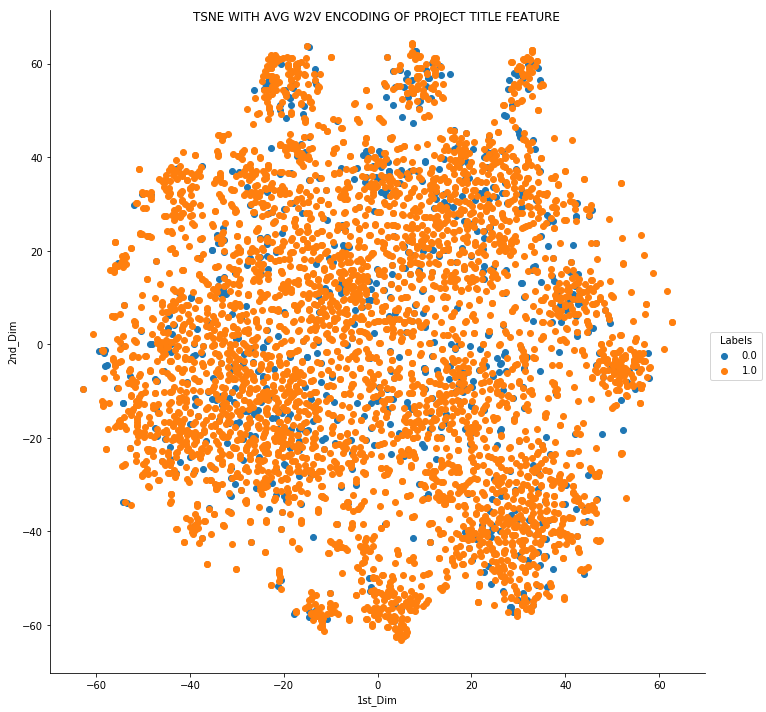

In [120]:
sns.FacetGrid(tsne_df_avg_w2v, hue = "Labels", size = 10).map(plt.scatter, "1st_Dim", "2nd_Dim")\
.add_legend().fig.suptitle("TSNE WITH AVG W2V ENCODING OF PROJECT TITLE FEATURE ")
plt.show()

### 2.4 TSNE with TFIDF Weighted W2V encoding of project_title  with 5000 Data points

In [121]:
X = hstack((categories_one_hot, sub_categories_one_hot, school_state_categories_one_hot, \
            project_grade_categories_one_hot, teacher_prefix_categories_one_hot, price_standardized,\
            quantity_standardized, prev_projects_standardized, tfidf_w2v_vectors_title))
X.shape

(109248, 404)

In [123]:
X = X.tocsr()
X_new = X[0:5000,:]

In [124]:
X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity = 30, random_state = 0,learning_rate=200)
tsne_data_tfidf_w2v = model.fit_transform(X_new)

In [125]:
tsne_data_tfidf_w2v = np.vstack((tsne_data_tfidf_w2v.T, labels_new)).T
tsne_df_tfidf_w2v = pd.DataFrame(tsne_data_tfidf_w2v, columns = ("1st_Dim","2nd_Dim","Labels"))
tsne_df_tfidf_w2v.shape

(5000, 3)

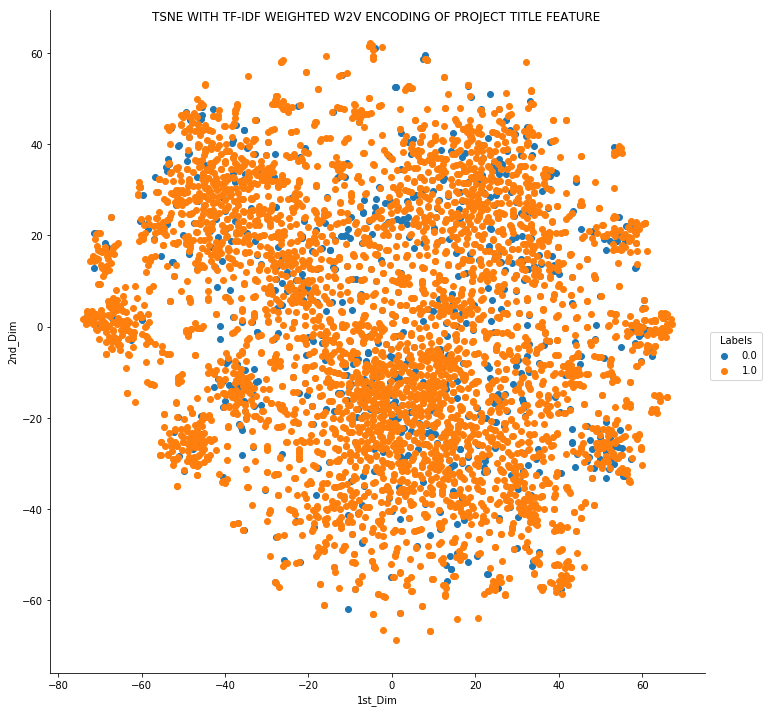

In [126]:
sns.FacetGrid(tsne_df_tfidf_w2v, hue = "Labels", size = 10).map(plt.scatter, "1st_Dim", "2nd_Dim")\
.add_legend().fig.suptitle("TSNE WITH TF-IDF WEIGHTED W2V ENCODING OF PROJECT TITLE FEATURE ")
plt.show()

### 2.5 TSNE with BOW TFIDF AVG W2V  TFIDF Weighted W2V  encoding of  project_title 5000 Data points

In [128]:
X = hstack((categories_one_hot, sub_categories_one_hot, school_state_categories_one_hot,\
            project_grade_categories_one_hot, teacher_prefix_categories_one_hot, price_standardized,\
            quantity_standardized, prev_projects_standardized, title_bow, title_tfidf, avg_w2v_vectors_titles,\
            tfidf_w2v_vectors_title))
X.shape

(109248, 7362)

In [129]:
X = X.tocsr()
X_new = X[0:5000,:]

In [130]:
X_new = X_new.toarray()
model = TSNE(n_components = 2, perplexity = 100.0, random_state = 0)
tsne_data_complete = model.fit_transform(X_new)

In [131]:
tsne_data_complete = np.vstack((tsne_data_complete.T, labels_new)).T
tsne_df_complete = pd.DataFrame(tsne_data_complete, columns = ("1st_Dim","2nd_Dim","Labels"))
tsne_df_complete.shape

(5000, 3)

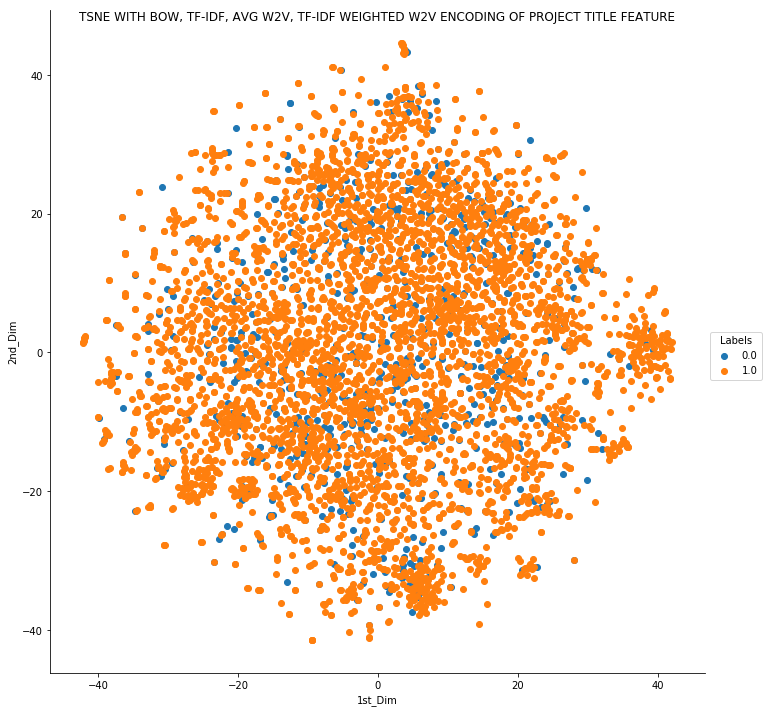

In [132]:
sns.FacetGrid(tsne_df_complete, hue = "Labels", size = 10).map(plt.scatter, "1st_Dim", "2nd_Dim")\
.add_legend().fig.suptitle("TSNE WITH BOW, TF-IDF, AVG W2V, TF-IDF WEIGHTED W2V ENCODING OF PROJECT TITLE FEATURE ")
plt.show()

## Conclusion of the data analysis

1. The state wise prediction of data represents Delaware(DE) has the highest percent of projects accepted rate, which is follows by North Dakota(ND) and Washington(WA) nearly 89% and 88%  projects accepted rate of each.
2. Considering the lower approval rate, Vermont(VT) has the lowest Approval rate of 80% . Followed by District of Columbia(DC) and Texas(TX) with nearly 80% and 81% of acceptance rate.
3. Female and experinced tecahers have more number of posted projects and acceptance rate, the male tecahers are comparebly on  lower side.
4. Projects belonging to multiple categories like Literacy and Language has higher projects approval and have the acceptance rate of  87%.
5. The number of projects proposed Pre Kindergarden and 2nd Grade are high , whereas the increasing grade results in decrease of the project submission.
6. Projects of 9th Grade and 12th Grade have the lowest submitted projects and acceptence rate.
7. The highest number of projects are submitted are of Literacy and Langauage categories with 52,239 projects submission and the next is Maths and Science categories wherein 41,421 projects were submitted.
8. Literacy sub-Category with the most number of projects approved and acceptance rate of 88% with 8371 projects submitted . whereas sub-Category Health and Wellness has the lowest number of projects submitted.
9. Most of the projects have 3, 4 words in the title. Only one submission with title of 13 words.
10. The Maximum price for any project approved is 10,000 dollars.The approved projects tend to have lower price then the projects which are not been approved.
11. The PrettyTable , we can conclude that the projects having relatively low cost were approved.
12.  Visualisation of TSNE with Bag of Words, TF-IDF, Avg Word2Vec, TF-IDF Weighted Word2Vec does not propsed result of clustering the approved and not approved data points.

In [3]:
!jupyter nbconvert --to html Donors_choose_Assignment_Final.ipynb

[NbConvertApp] Converting notebook Donors_choose_Assignment_Final.ipynb to html
[NbConvertApp] Writing 4976857 bytes to Donors_choose_Assignment_Final.html
